In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AIML_IITG/Datasets/cancer_tumor_data_features.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Attribute Information:
 - radius (mean of distances from center to points on the
perimeter)
 - texture (standard deviation of gray-scale values)
 - perimeter
 - area
 - smoothness (local variation in radius lengths)
 - compactness (perimeter^2 / area - 1.0)
 - concavity (severity of concave portions of the contour)
 - concave points (number of concave portions of the contour)
 - symmetry
 - fractal dimension ("coastline approximation" - 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# Scaling the Data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [6]:
sc_X = sc.fit_transform(df)

In [7]:
sc_X.mean()

np.float64(-6.826538293184326e-17)

In [8]:
#grab covariance matrix

covariance_matrix = np.cov(sc_X,rowvar=False)


#Get eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [9]:
#Choose some number of components

num_components = 2

In [10]:
#Get index sorting key based on eigen values

sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [11]:
#Get num of components of eigen values and eigen vectors

eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:,sorted_key]

In [12]:
#dot product of original data and eigen vectors are pc values (projection step)

principal_components = np.dot(sc_X, eigen_vectors)

In [13]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

# Scikit-Learn Implementation

In [14]:
from sklearn.decomposition import PCA

In [15]:
#help(PCA)

In [16]:
pca = PCA(n_components=2)

In [17]:
principal_components = pca.fit_transform(sc_X)

Text(0, 0.5, 'Second Principal Component')

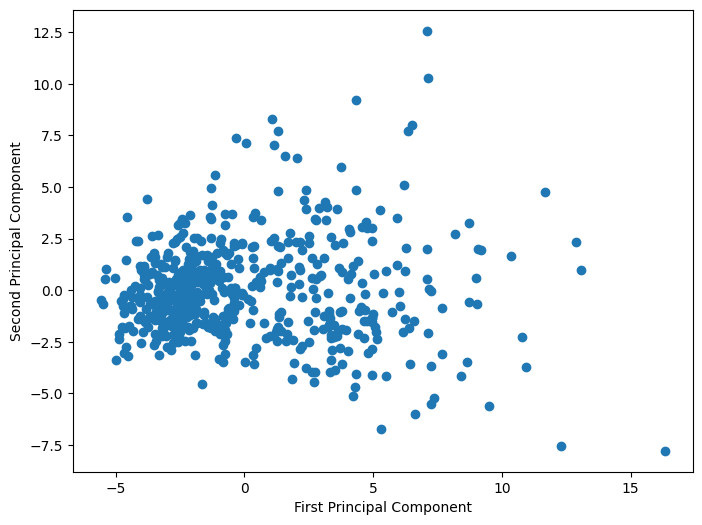

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
load_breast_cancer()['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Text(0, 0.5, 'Second Principal Component')

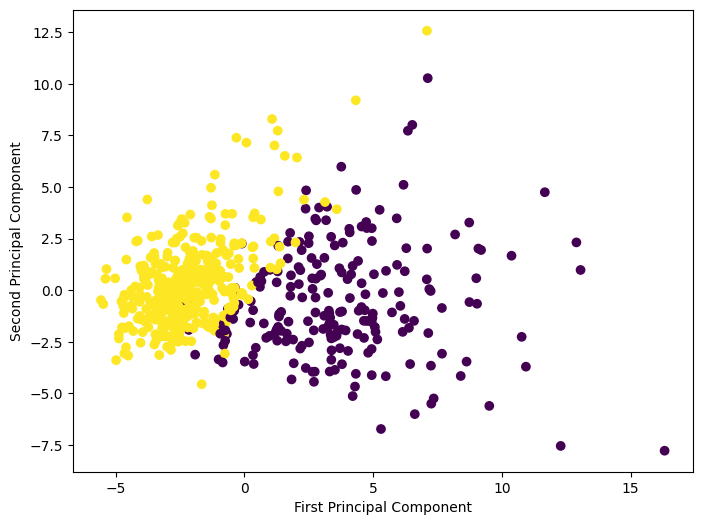

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1],c=load_breast_cancer()['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Fitten Model Attributes

In [22]:
pca.n_components

2

In [23]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [24]:
pca.components_.shape

(2, 30)

In [25]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [26]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.6324320765155944)

In [27]:
#thought experiment
pca_30 = PCA(n_components=30)
pca_30.fit_transform(sc_X)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         3.39144536e-02, -4.56477199e-02,  4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -3.26241827e-02,  5.68742432e-03,  1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.70258247e-02, -3.14589659e-03, -7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         2.57775589e-03, -6.70621179e-03, -3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         6.80863833e-02,  8.41632764e-02,  2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         9.51587894e-03,  6.09131090e-02,  1.94755854e-02]])

In [28]:
pca_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [29]:
np.sum(pca_30.explained_variance_ratio_)

np.float64(1.0000000000000002)

In [30]:
#optimum number of PCs based on variance explained

explained_variance = []

for n in range(1,30):
  pca = PCA(n_components=n)
  pca.fit(sc_X)

  explained_variance.append(np.sum(pca.explained_variance_ratio_))

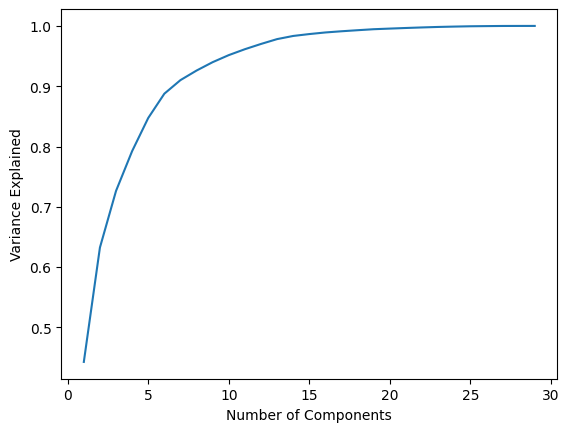

In [31]:
plt.plot(range(1,30),explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()